In [92]:
import numpy as np
import matplotlib.pyplot as plt
import codebase.nsga2 as nsga2
from typing import List

N = 10
ALPHA = 0.5
P_MU = 0.01

# Part 2

In [93]:
class P3Individual(nsga2.Individual):
    def __init__(self, v: List[float]):
        super().__init__(v)

    def __repr__(self):
        return f"{self.v[0]}"

    def __hash__(self):
        return hash(self.v[0])

In [94]:
def make_new_pop(current_pop: nsga2.Population) -> nsga2.Population:
    cp_list = list(current_pop.copy())
    new_pop = []
    while len(new_pop) < len(current_pop):
        np.random.shuffle(cp_list)
        mid = len(cp_list) // 2
        parent1 = sorted(cp_list[:mid])[0]
        parent2 = sorted(cp_list[mid:])[0]
        parent1, parent2 = sorted([parent1, parent2])

        new_x = np.random.uniform(
            max(-5, parent1.v[0] + ALPHA * (parent2.v[0] - parent1.v[0])),
            min(5, parent2.v[0] - ALPHA * (parent2.v[0] - parent1.v[0])))
        if np.random.uniform() < P_MU:
            new_x += np.random.normal(0, 1)

        if P3Individual([new_x]) not in new_pop and P3Individual([new_x]) not in current_pop:
            new_pop.append(P3Individual([new_x]))

    return new_pop

In [95]:
def p3_apply_obj(individuals: nsga2.Population):
    for ind in individuals:
        x = ind.v[0]
        ind.function_values = [x ** 2, (x - 2) ** 2]

In [96]:
pop0 = []
gen_p0 = [P3Individual([v]) for v in (np.random.uniform(size=N) * 10 - 5)]
p3_apply_obj(gen_p0)
frontiers = nsga2.fast_non_dominated_sort(gen_p0)
for e in frontiers:
    pop0.extend(e)
result = nsga2.nsga2(p3_apply_obj, pop0, make_new_pop, 2, 20)

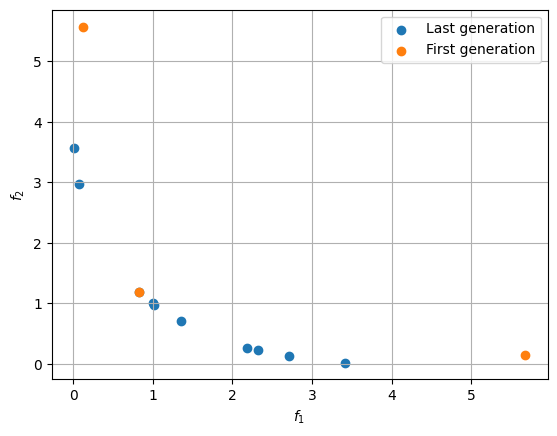

In [97]:
frontiers = nsga2.fast_non_dominated_sort(result.populations[-1])
xs, ys = np.transpose([ind.function_values for ind in frontiers[0]])
plt.scatter(xs, ys, label="Last generation")

frontiers = nsga2.fast_non_dominated_sort(result.populations[0])
xs, ys = np.transpose([ind.function_values for ind in frontiers[0]])
plt.scatter(xs, ys, label="First generation")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.grid()
plt.legend()

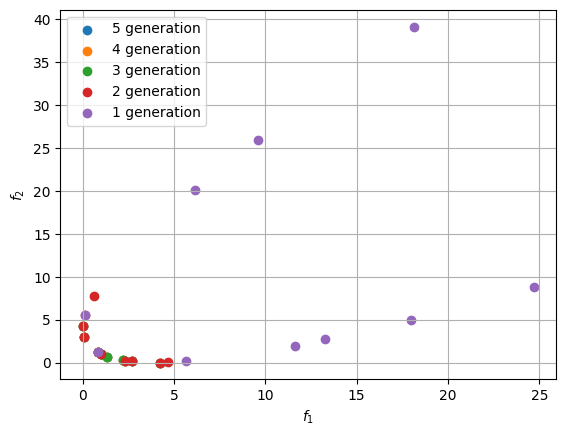

In [98]:
for i, pop in enumerate(result.populations[4::-1]):
    xs, ys = np.transpose([ind.function_values for ind in pop])
    plt.scatter(xs, ys, label=f"{5 - i} generation")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.grid()
plt.legend()

# Part 3

In [99]:
def f2(x):
    return [x ** 2, (x - 2) ** 2]

In [100]:
weight = np.array([0.8, 0.2])


def p3_apply_obj2(individuals: nsga2.Population):
    for ind in individuals:
        x = ind.v[0]
        y1 = x ** 2
        y2 = (x - 2) ** 2
        # ind.function_values = [np.dot([y1, y2], weight), y1, y2]
        ind.function_values = [np.dot([y1, y2], weight)]


In [101]:
pop0 = []
gen_p0 = [P3Individual([v]) for v in (np.random.uniform(size=N) * 10 - 5)]
p3_apply_obj2(gen_p0)
frontiers = nsga2.fast_non_dominated_sort(gen_p0)
for e in frontiers:
    pop0.extend(e)
result2 = nsga2.nsga2(p3_apply_obj2, pop0, make_new_pop, 1, 10)

1


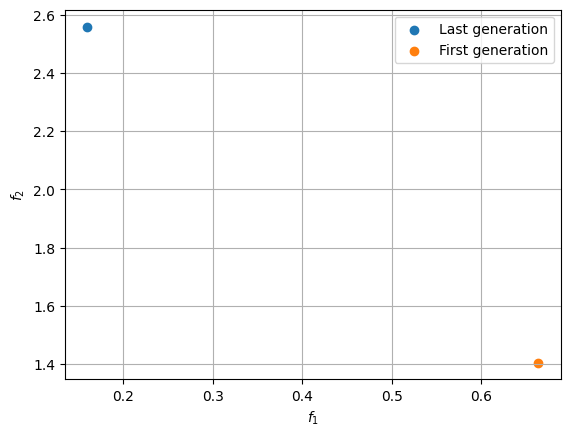

In [102]:
frontiers = nsga2.fast_non_dominated_sort(result2.populations[-1])
xs, ys = np.transpose([f2(ind.v[0]) for ind in frontiers[0]])
plt.scatter(xs, ys, label="Last generation")
print(len(frontiers[0]))

frontiers = nsga2.fast_non_dominated_sort(result2.populations[0])
xs, ys = np.transpose([f2(ind.v[0]) for ind in frontiers[0]])
plt.scatter(xs, ys, label="First generation")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.grid()
plt.legend()

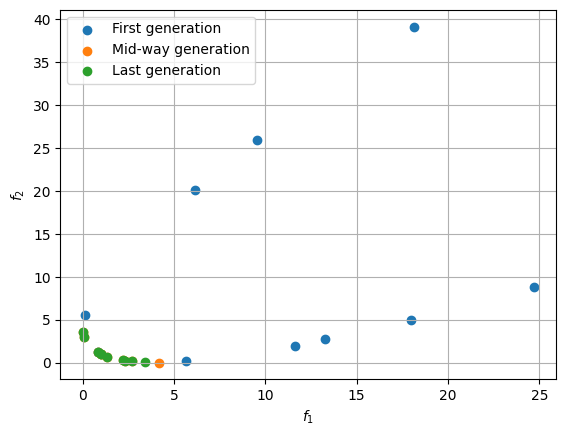

In [103]:
xs, ys = np.transpose([f2(ind.v[0]) for ind in result.populations[0]])
plt.scatter(xs, ys, label=f"First generation")
xs, ys = np.transpose([f2(ind.v[0]) for ind in result.populations[len(result.populations) // 2]])
plt.scatter(xs, ys, label=f"Mid-way generation")
xs, ys = np.transpose([f2(ind.v[0]) for ind in result.populations[-1]])
plt.scatter(xs, ys, label=f"Last generation")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.grid()
plt.legend()

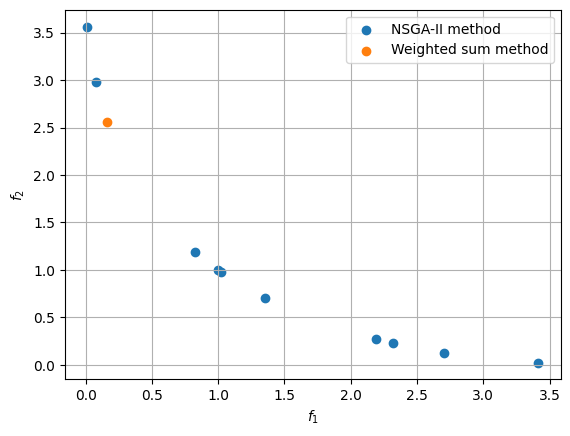

In [104]:
frontiers = nsga2.fast_non_dominated_sort(result.populations[-1])
xs, ys = np.transpose([ind.function_values for ind in frontiers[0]])
plt.scatter(xs, ys, label="NSGA-II method")

frontiers = nsga2.fast_non_dominated_sort(result2.populations[-1])
xs, ys = np.transpose([f2(ind.v[0]) for ind in frontiers[0]])
plt.scatter(xs, ys, label="Weighted sum method")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.grid()
plt.legend()